In [1]:
import matplotlib.pyplot as plt

import vjp.data as data

In [2]:
second_instance_sampels = data.load_second_instance()

Samples are parsed as Python XML element trees. Queries can be done per-element through [the XPath syntax](https://docs.python.org/3/library/xml.etree.elementtree.html#supported-xpath-syntax). `vjp.data.finall` permits querying an entire list. All results from all queries are added to an output list.

In [3]:
print('Number of instances', len(second_instance_sampels))
print('Number of second instance requests', len(data.findall(second_instance_sampels, ".//partreq[@G='2']/req")))

decisions, decision_mapping = data.findall(second_instance_sampels, ".//courtdec[@G='2']/dec")
upheld, _ = data.findall(decisions, ".[@E='1']")
rejected, _ = data.findall(decisions, ".[@E='0']")
print('Number of second instance decisions', len(decisions))
print('Of which upheld', len(upheld))
print('Of which rejected', len(rejected))
print('Other outcomes', len(decisions) - len(upheld) - len(rejected))

Number of instances 219
Number of second instance requests 2
Number of second instance decisions 249
Of which upheld 110
Of which rejected 135
Other outcomes 4


Some decisions reference multiple requests. A decision that implies the result of multiple requests may be later splitted.

Some decisions reference claims. This shall be investigated (do they imply a label for some given requests?). The number is relatively small, they could be ignored. 

In [4]:
objects = tuple(map(lambda x: x.get('O'), decisions))
print(set(objects))
print('Number of claim objects: ', len(tuple(filter(lambda s: not s.startswith('Req'), objects))))

{'Req6', 'Req3', 'Req2|Req3', 'Req2|Req5', 'Req5', 'Claim5', 'Claim2', 'Req1|Req2', 'Req2', 'Req4|Req5', 'Claim3', 'Req1', 'Claim4', 'Claim1', 'Req20', 'Req10', 'Req3|Req4|Req5', 'Req4'}
Number of claim objects:  6


Given the very low amount of different outcomes, the problem will be treated as a binary classification one. Labels are not perfectly balanced.

(array([110.,   0.,   0., 135.,   0.,   0.,   3.,   0.,   0.,   1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

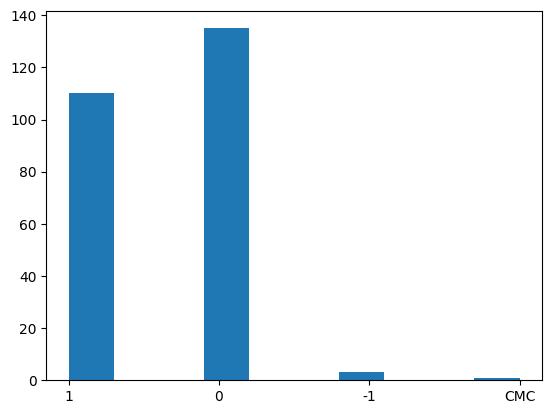

In [5]:
plt.hist(tuple(map(lambda x: x.get('E'), decisions)))

Other outcomes can be dropped.

In [6]:
decisions = upheld + rejected

Data will need some processing and handling of special cases. Some values can be `None` (empty tags?).

In [7]:
for decision in decisions[:10]:
    print(decision.text, '\n')

Accoglie l'appello e, in riforma della sentenza impugnata, rigetta il ricorso 
    della contribuente  

La sezione pronunciando sull’appello proposto dal contribuente e dall'Ufficio avverso la sentenza 63/04/2009 emanata dalla Commissione Tributaria Provinciale de L'Aquila così provvede:

		Accoglie parzialmente l’appello del contribuente, limitatamente alla correzione dell'errore materiale, 

In parziale accoglimento sia dell'appello principale che dell'appello incidentale ed
    inconseguente parziale riforma della decisione impugnata, dichiara la legittimità del
    recupero a tassazione della somma portata a credito d'imposta; 

determina in complessivi €23.227,05 i recuperi per l'anno 2004; 

dichiara la illegittimità dei recuperi effettuati per i
    servizi svolti ad opera della “Tennis Club SC” e del giornale “LN”. 

None 

Questa Commissione Tributaria Regionale accoglie l’appello della E S.r.l. 
        riconoscendo legittima l’istanza di rimborso avanzata dalla stessa alla 

In [8]:
multiple_link_decisions = tuple(filter(lambda e: '|' in e.get('O'), decisions))

In [9]:
decision = multiple_link_decisions[0]
print(decision.attrib)
print(data.extract_link(decision, 'O'))
data.extract_link_elements(decision_mapping[decision], decision, 'O')

{'ID': 'Dec2', 'G': '2', 'E': '1', 'O': 'Req2|Req3', 'D': 'Mot1'}
['Req2', 'Req3']


[<Element 'req' at 0x7efff5495f30>, <Element 'req' at 0x7efff5495f80>]